In [ ]:
#@title **CNN WITH MNIST DATASET**

In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plot
import pandas as pd

from  tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!nvidia-smi

Sat Dec 10 12:32:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    24W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
tf.__version__

'2.9.2'

In [ ]:
# DOWNLOAD TRAIN AND TEST IMAGE WITH MNIST DATASET

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

 57221120/170498071 [=========>....................] - ETA: 4s

KeyboardInterrupt: ignored

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(50000, 10000, 50000, 10000)

In [ ]:
#@title **Normalization of pixels**

In [ ]:

X_train, X_test = X_train/255.0, X_test/255.0


In [ ]:
X_train
print('Min: %.3f, Max: %.3f' % (X_train.min(), X_train.max()))
print('Min: %.3f, Max: %.3f' % (X_test.min(), X_test.max()))

Min: 0.000, Max: 1.000
Min: 0.000, Max: 1.000


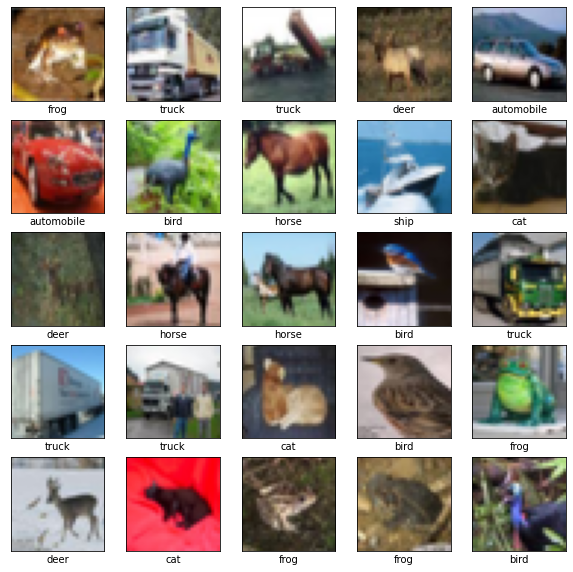

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
#@title **MODEL SEQUENTIAL**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='sigmoid'),

     
    tf.keras.layers.Dense(10)
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
#@title COMPILE

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
# model learning rate scheduler

def learn_features(epoch):

  learning_rate = 0.001

  if epoch >= 10:
    learning_rate

  elif epoch >= 20:
    learning_rate = 0.01

  elif epoch >= 30:
    learning_rate = 0.1 

  return learning_rate





In [ ]:
learning_rate = tf.keras.callbacks.LearningRateScheduler(schedule=learn_features)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test), callbacks=[learning_rate])

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5797 - accuracy: 0.4258 - val_loss: 1.3112 - val_accuracy: 0.5266 - lr: 0.0010
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2091 - accuracy: 0.5691 - val_loss: 1.1114 - val_accuracy: 0.6061 - lr: 0.0010
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0493 - accuracy: 0.6302 - val_loss: 1.0365 - val_accuracy: 0.6367 - lr: 0.0010
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9446 - accuracy: 0.6679 - val_loss: 0.9889 - val_accuracy: 0.6584 - lr: 0.0010
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8732 - accuracy: 0.6935 - val_loss: 0.9326 - val_accuracy: 0.6789 - lr: 0.0010
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8170 - accuracy: 0.7137 - val_loss: 0.9607 - val_accuracy: 0.6605 - lr: 0.0010
Epoch 7/20
1563/1563 [==============================] - 7s

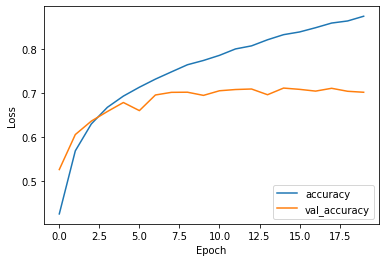

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc= 'lower right')

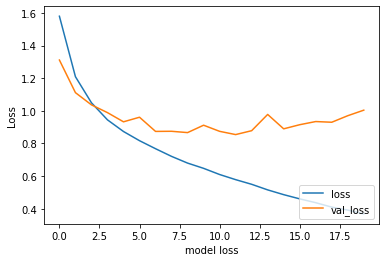

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.xlabel('model loss')
plt.ylabel('Loss')

plt.legend(loc= 'lower right')

Text(0.5, 1.0, 'Model Loss and Accuracy')

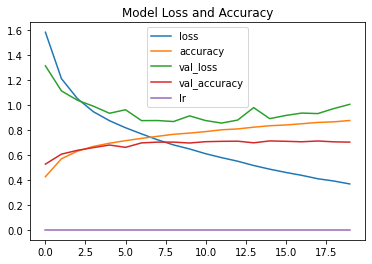

In [ ]:
history_data = pd.DataFrame(history.history)


history_data.plot()
plt.title("Model Loss and Accuracy")

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download Multiclass-Food-Classification-using-TensorFlow -f food-101.csv

403 - Forbidden


In [11]:
import zipfile

!wget 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'

--2022-12-10 12:34:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  21.5MB/s    in 5.7s    

2022-12-10 12:34:27 (18.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
'''The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

🔑 Note: We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.'''

"The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101\n\nHowever we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb\n\n🔑 Note: We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up."

In [12]:
zipdata = zipfile.ZipFile('pizza_steak.zip')
zipdata.extractall()
zipdata.close()

In [14]:
# visualize data

!ls pizza_steak | wc-l

/bin/bash: wc-l: command not found


In [15]:
!ls pizza_steak/train

pizza  steak


In [16]:
!ls pizza_steak/train/pizza | wc -l

750


In [17]:
!ls pizza_steak/train/steak | wc -l

750


In [18]:
!ls pizza_steak/test/steak | wc -l

250


In [19]:
!ls pizza_steak/test/pizza | wc -l

250


In [20]:
import os

In [21]:
for  dirpath, dirnames, filename in os.walk("pizza_steak"):
  print(f" There are {len(dirnames)} directories and {len( filename)} filenames in path  {len(dirpath)}")
  print("===========================================")

 There are 2 directories and 0 filenames in path  11
 There are 2 directories and 0 filenames in path  16
 There are 0 directories and 250 filenames in path  22
 There are 0 directories and 250 filenames in path  22
 There are 2 directories and 0 filenames in path  17
 There are 0 directories and 750 filenames in path  23
 There are 0 directories and 750 filenames in path  23


In [22]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Dec 10 12:34 .
drwxr-xr-x 1 root root 4096 Dec 10 12:34 ..
drwxr-xr-x 4 root root 4096 Dec 10 12:34 test
drwxr-xr-x 4 root root 4096 Dec 10 12:34 train


In [23]:
# another of way finding number of image in directory

images_train = len(os.listdir("pizza_steak/train/pizza"))

images_train

750

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os


In [25]:


def view_random_image(image_path, image_name):

  image_path = image_path + image_name

  random_image = random.sample(os.listdir(image_path), 1)

  print(f"Random Image : {random_image}")
  
  image = mpimg.imread(image_path + "/"+random_image[0])
  plt.imshow(image)

  plt.title(image_name)

  plt.axis("off")

  print(f"Image Shape: {image.shape}")

  return image


Random Image : ['216720.jpg']
Image Shape: (512, 384, 3)


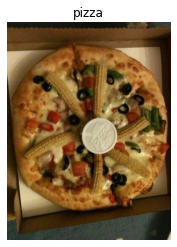

In [26]:
image_view = view_random_image("/content/pizza_steak/train/",
                               "pizza")

In [ ]:
#@title START TENSORFLOW


In [ ]:
import tensorflow as tf



In [ ]:
image_view.shape

(341, 512, 3)

In [ ]:
image_scaled = image_view/255.0

In [ ]:
image_scaled.max()

1.0

In [113]:
#@title **PIZZA DATASET**

tf.random.set_seed(42)


'''train_datagen = ImageDataGenerator(
    rescale = 1./255
)

val_datagen = ImageDataGenerator(
    rescale = 1./255
)'''

train_dir = "/content/pizza_steak/train"
val_dir = "/content/pizza_steak/test"



In [28]:
# import train and test from directories and turn them to bathces

train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode= 'binary'
)

val_data = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(224,224),
    batch_size =32,
    class_mode = 'binary'

)

NameError: ignored

In [ ]:
image_test,label_test = train_data.next()
random_samples = random.randint(0,32)


<Figure size 432x288 with 0 Axes>

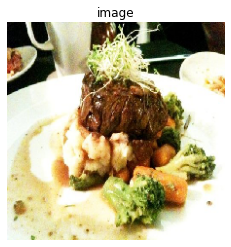

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.imshow(image_test[random_samples])
plt.title(f"image")
plt.axis(False)
plt.figure()

In [ ]:
model_2 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=(224, 224, 3)),
    
    tf.keras.layers.Conv2D(10, kernel_size=(3,3), activation = "relu"),

    tf.keras.layers.MaxPool2D(pool_size = (2,2), padding="valid"),

    tf.keras.layers.Conv2D(10, kernel_size=(3,3), activation = "relu"),
    tf.keras.layers.Conv2D(10, kernel_size=(3,3), activation = "relu"),

    tf.keras.layers.MaxPool2D(pool_size = (2,2)),

    # flattening
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      2890      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
len(train_data)

47

In [ ]:
len(val_data)

16

In [ ]:
# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data))


Epoch 1/5
47/47 [==============================] - 21s 266ms/step - loss: 0.6548 - accuracy: 0.5947 - val_loss: 0.5348 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 11s 238ms/step - loss: 0.4900 - accuracy: 0.7580 - val_loss: 0.4775 - val_accuracy: 0.7640
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4690 - accuracy: 0.7920 - val_loss: 0.4173 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.4287 - accuracy: 0.8067 - val_loss: 0.3488 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3840 - accuracy: 0.8320 - val_loss: 0.3145 - val_accuracy: 0.8760


In [ ]:
dataframe_history = pd.DataFrame(history_2.history)

In [ ]:
#@title TRAIN_LOSS AND VAL_LOSS  loss: 0.3840 - accuracy: 0.8320 - val_loss: 0.3145, TRAIN ACCURACY : 0.8320, VAL ACCURACY 0.8760

In [40]:

# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();
     


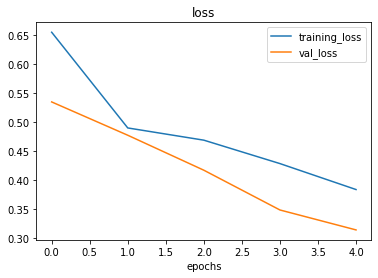

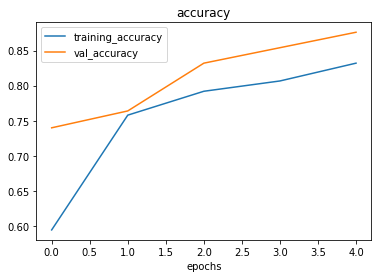

In [ ]:
plot_loss_curves(history_2)

In [77]:
#@title **AUGMENTATION TECHNIQUES APPLIED TOU IMAGES**

train_datagen = ImageDataGenerator(
    rescale = 1./255
)


# Create ImageDataGenerator training instance with data augmentation
train_augmentation_data = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis



test_data_noagumentation = ImageDataGenerator(1./255)

In [52]:
from tensorflow.keras.utils import array_to_img, img_to_array, load_img



In [ ]:
#@title CNN EXPLAINER WEBSTIRE:https://poloclub.github.io/cnn-explainer/

In [53]:
train_augmentation_flow = train_augmentation_data.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)




test_noaugment = test_data_noagumentation.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

train_test = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [54]:
augmented_images, labels = train_augmentation_flow.next()
augmented_test, label_test = test_noaugment.next()
augment_test, labe = train_test.next()

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [34]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

<Figure size 432x288 with 0 Axes>

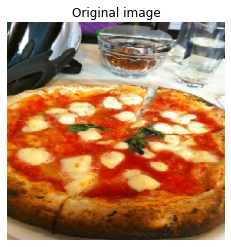

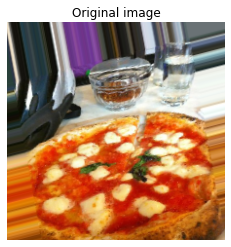

<Figure size 432x288 with 0 Axes>

In [58]:
samples = random.randint(0,32)

plt.imshow(augment_test[samples])
plt.title(f"Original image")
plt.axis(False)
plt.figure()


plt.imshow(augmented_images[samples])
plt.title(f"Original image")
plt.axis(False)
plt.figure()

In [61]:
# create model

model_overfitted = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='valid', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2),
  
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [62]:
model_overfitted.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)
  

In [63]:
history = model_overfitted.fit(train_augmentation_flow, epochs= 5, steps_per_epoch=len(train_augmentation_flow),validation_data= test_noaugment, validation_steps=len(test_noaugment))

Epoch 1/5
47/47 [==============================] - ETA: 0s - loss: 0.7446 - accuracy: 0.4347

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


47/47 [==============================] - 25s 515ms/step - loss: 0.7446 - accuracy: 0.4347 - val_loss: 1.8314 - val_accuracy: 0.5740
Epoch 2/5
47/47 [==============================] - 22s 467ms/step - loss: 0.6936 - accuracy: 0.4267 - val_loss: 0.8125 - val_accuracy: 0.5060
Epoch 3/5
47/47 [==============================] - 24s 521ms/step - loss: 0.6931 - accuracy: 0.5560 - val_loss: 0.8478 - val_accuracy: 0.5240
Epoch 4/5
47/47 [==============================] - 23s 489ms/step - loss: 0.7028 - accuracy: 0.5307 - val_loss: 2.1523 - val_accuracy: 0.5240
Epoch 5/5
47/47 [==============================] - 22s 466ms/step - loss: 0.7173 - accuracy: 0.5407 - val_loss: 0.7155 - val_accuracy: 0.5380


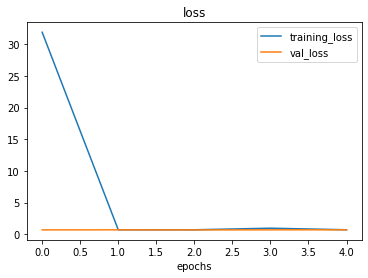

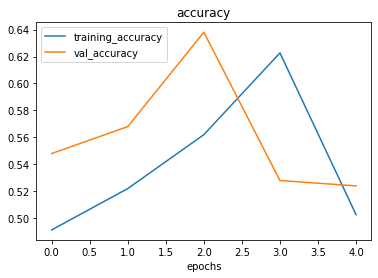

In [41]:
plot_loss_curves(history)

In [115]:
#@title SHUFFLED DATA

train_augmentation_shuffled_2 = train_augmentation_data.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_noaugment_NOshuffled = test_data_noagumentation.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [85]:
# create model

model_shuffled_data_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='valid', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2),
  
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [86]:
model_shuffled_data_3.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)
  

In [87]:
history_shuffled = model_shuffled_data_3.fit(train_augmentation_shuffled_2 , epochs= 5, steps_per_epoch=len(train_augmentation_shuffled_2),validation_data=
test_noaugment_NOshuffled, validation_steps=len(test_noaugment_NOshuffled))

Epoch 1/5
47/47 [==============================] - ETA: 0s - loss: 0.7844 - accuracy: 0.5033

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


47/47 [==============================] - 23s 477ms/step - loss: 0.7844 - accuracy: 0.5033 - val_loss: 3.2044 - val_accuracy: 0.5060
Epoch 2/5
47/47 [==============================] - 23s 487ms/step - loss: 0.6990 - accuracy: 0.5147 - val_loss: 0.7635 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 23s 488ms/step - loss: 0.6947 - accuracy: 0.5453 - val_loss: 18.8711 - val_accuracy: 0.5020
Epoch 4/5
47/47 [==============================] - 22s 468ms/step - loss: 0.6616 - accuracy: 0.6613 - val_loss: 55.6552 - val_accuracy: 0.5060
Epoch 5/5
47/47 [==============================] - 23s 495ms/step - loss: 0.7247 - accuracy: 0.4873 - val_loss: 0.8086 - val_accuracy: 0.5340


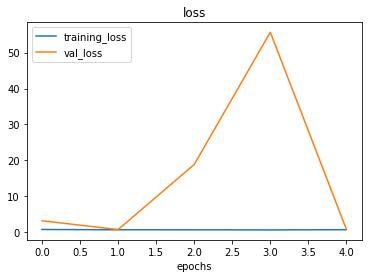

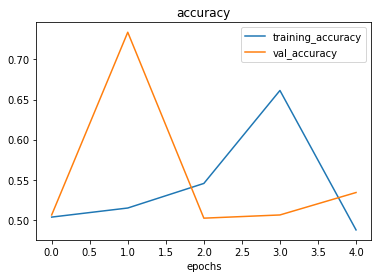

In [88]:
plot_loss_curves(history_shuffled)

In [97]:
#@title read and predict on raw image

def read_predict(filename,image_shape=224):
 
  #read filename
  image_raw = tf.io.read_file(filename)

  # decode 
  decoded_image = tf.io.decode_image(image_raw, channels=3)
  
  #resize
  resized_image = tf.image.resize(decoded_image, size=[image_shape, image_shape])

  #expand dimensipn

  expand_img_dim = tf.expand_dims(resized_image, axis=0)

  #rescale
  rescaled_img = expand_img_dim/255.

  return rescaled_img


In [90]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 

--2022-12-10 13:29:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.008s  

2022-12-10 13:29:42 (243 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



In [92]:

# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


(-0.5, 3023.5, 4031.5, -0.5)

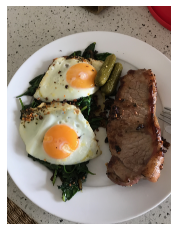

In [94]:
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [95]:
steak.shape

(4032, 3024, 3)

In [98]:
steak = read_predict("03-steak.jpeg")

In [100]:
steak.shape

TensorShape([1, 224, 224, 3])

In [103]:
pred = model_shuffled_data_3.predict(steak)

1/1 [==============================] - 0s 16ms/step


In [104]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [112]:
pred_class = class_names[int(tf.round(pred)[0][0])]

pred_class

'automobile'

In [127]:
#@title **AUGMENTATION TECHNIQUES APPLIED TOU IMAGES**

# Create ImageDataGenerator training instance with data augmentation
train_aug = ImageDataGenerator(rescale=1/255.,
                              rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                              zoom_range=0.2, # zoom into the image
                              width_shift_range=0.2, # shift the image width ways
                              height_shift_range=0.2, # shift the image height ways
                              horizontal_flip=True) # flip the image on the horizontal axis



test_aug = ImageDataGenerator(1./255)

In [128]:
#@title SHUFFLED DATA

train_shuffled = train_aug.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

test_shuffled = test_aug.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [134]:
#@title **OVERFITTING**

# create model

model_overfitting_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
  
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [135]:
model_overfitting_3.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [136]:
history_fitted = model_overfitting_3.fit(train_shuffled, epochs=5, steps_per_epoch=len(train_shuffled), validation_data=test_shuffled, validation_steps=len(test_shuffled))

Epoch 1/5
47/47 [==============================] - ETA: 0s - loss: 0.7077 - accuracy: 0.4473

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


47/47 [==============================] - 22s 458ms/step - loss: 0.7077 - accuracy: 0.4473 - val_loss: 11.7730 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6858 - accuracy: 0.5087 - val_loss: 14.0722 - val_accuracy: 0.5620
Epoch 3/5
47/47 [==============================] - 23s 481ms/step - loss: 0.6818 - accuracy: 0.5693 - val_loss: 85.3330 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 22s 470ms/step - loss: 0.6877 - accuracy: 0.5293 - val_loss: 44.5969 - val_accuracy: 0.5080
Epoch 5/5
47/47 [==============================] - 23s 485ms/step - loss: 0.6788 - accuracy: 0.6053 - val_loss: 16.6667 - val_accuracy: 0.6160


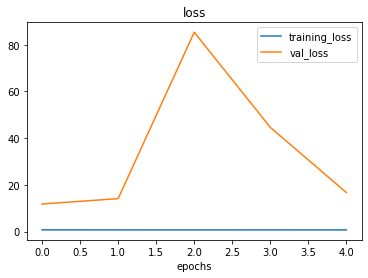

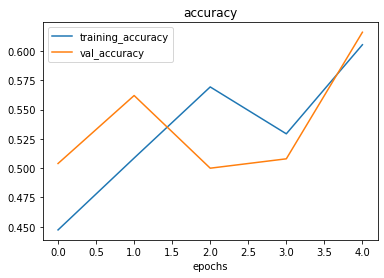

In [137]:
plot_loss_curves(history_fitted)